In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

# Import standard libraries
import os, sys
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import astropy.units as u
import emcee, corner
import seaborn as sns
import pandas as pd

import chimera

import coronagraph as cg
import smart
import smarter; smarter.utils.plot_setup()

/Users/lustija1/opt/anaconda3/lib/python3.8/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /Users/lustija1/Documents/PandExo_data/pysynphot_data/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/Users/lustija1/opt/anaconda3/lib/python3.8/site-packages/pysynphot/refs.py:117: UserWarning: No graph or component tables found; functionality will be SEVERELY crippled. No files found for /Users/lustija1/Documents/PandExo_data/pysynphot_data/mtab/*_tmg.fits
  warnings.warn('No graph or component tables found; '
/Users/lustija1/opt/anaconda3/lib/python3.8/site-packages/pysynphot/refs.py:124: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /Users/lustija1/Documents/PandExo_data/pysynphot_data/mtab/*_tmt.fits
  warnings.warn('No thermal tables found, '


In [73]:
import pysynphot as psyn

In [88]:
# Open and parse disk data
disk = pd.read_csv('exozodi/WASP-43.dat', delim_whitespace=True, names=['lambda', 'Jy', 'Jy3', 'Jy100', 'frat', 'frat3', 'frat100'])
lam_disk = disk['lambda'].values
flux_disk_jy = disk["Jy"].values

In [89]:
# Caste as pysn array for conversion
foo = psyn.ArraySpectrum(wave=lam_disk, flux=flux_disk_jy, waveunits='micron', fluxunits="jy")
foo.convert("flam") 
flux_disk = (foo.flux * u.erg/u.s/u.cm/u.cm/u.AA).to(u.W/u.m/u.m/u.m)

In [90]:
# Caste as pysn array for conversion
foo3 = psyn.ArraySpectrum(wave=disk['lambda'].values, flux=disk["Jy3"].values, waveunits='micron', fluxunits="jy")
foo3.convert("flam") 
fwat3 = (foo3.flux * u.erg/u.s/u.cm/u.cm/u.AA).to(u.W/u.m/u.m/u.m)

Text(0, 0.5, 'Flux [W/m$^2$/m]')

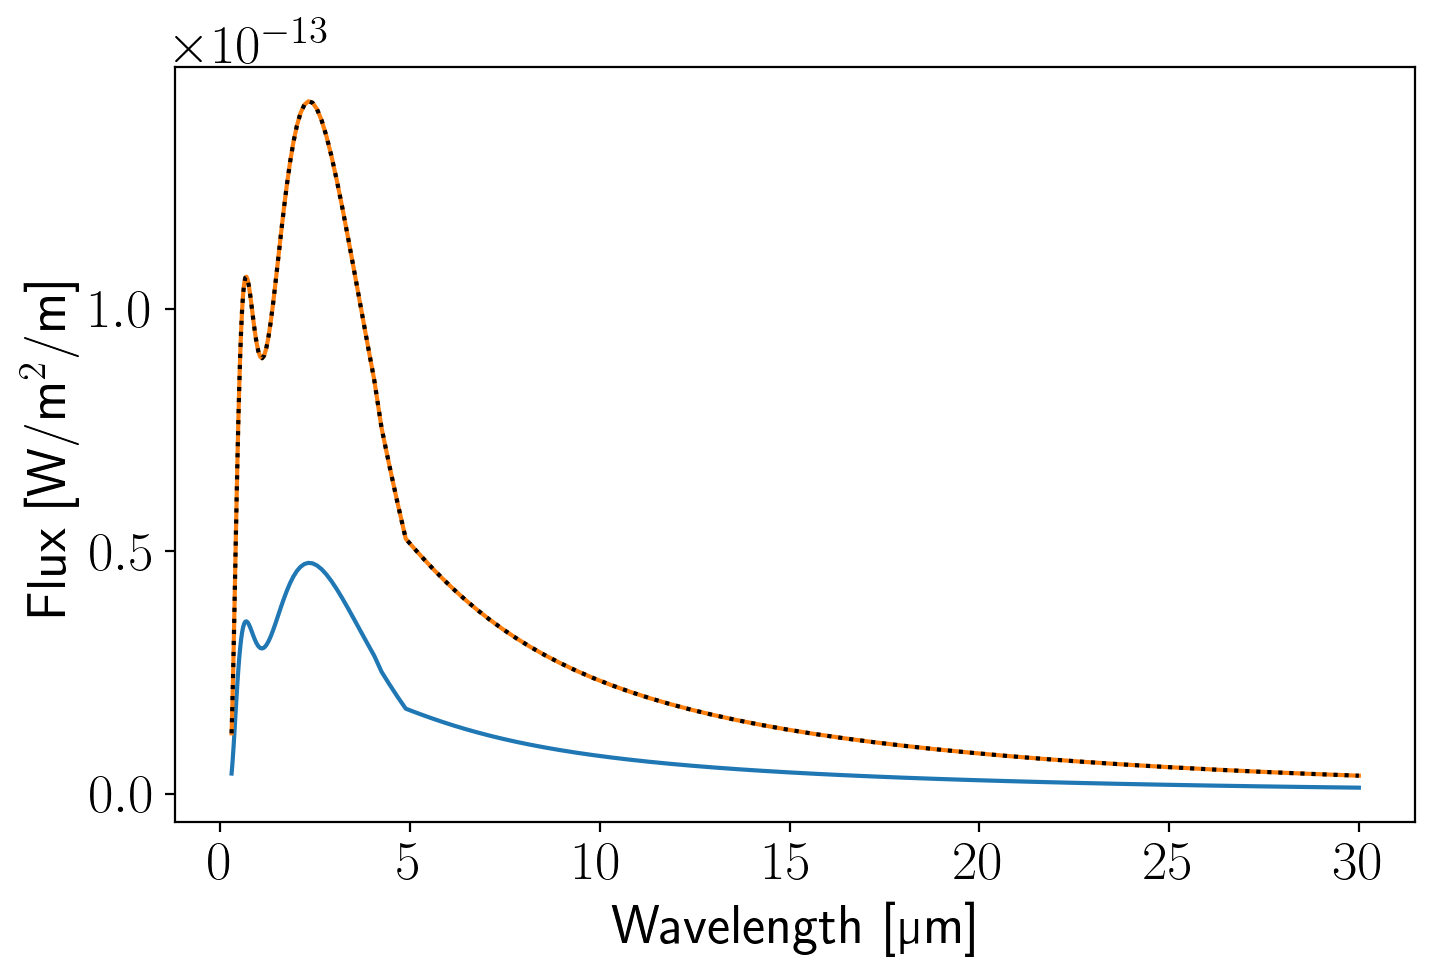

In [91]:
#plt.plot(disk["lambda"], disk["watt"])
plt.plot(disk["lambda"], flux_disk)
plt.plot(disk["lambda"], 3*flux_disk)
plt.plot(disk["lambda"], fwat3, ls="dotted", color = "k")
plt.xlabel("Wavelength [µm]")
plt.ylabel("Flux [W/m$^2$/m]")

In [16]:
import run_wasp43_free_allin as exopie

Loading Synthetic Data and xsecs...
Loading Synthetic Data and xsecs...


In [20]:
# Run model with default inputs
Fobs, Fstar_earth, Fplan_therm_earth, atm = exopie.exopie.run_pie_model_general(exopie.exopie.THETA0)

In [93]:
# interpolate disk onto star and planet flux grid
Fdisk = sp.interpolate.interp1d(lam_disk, flux_disk)(exopie.wl)

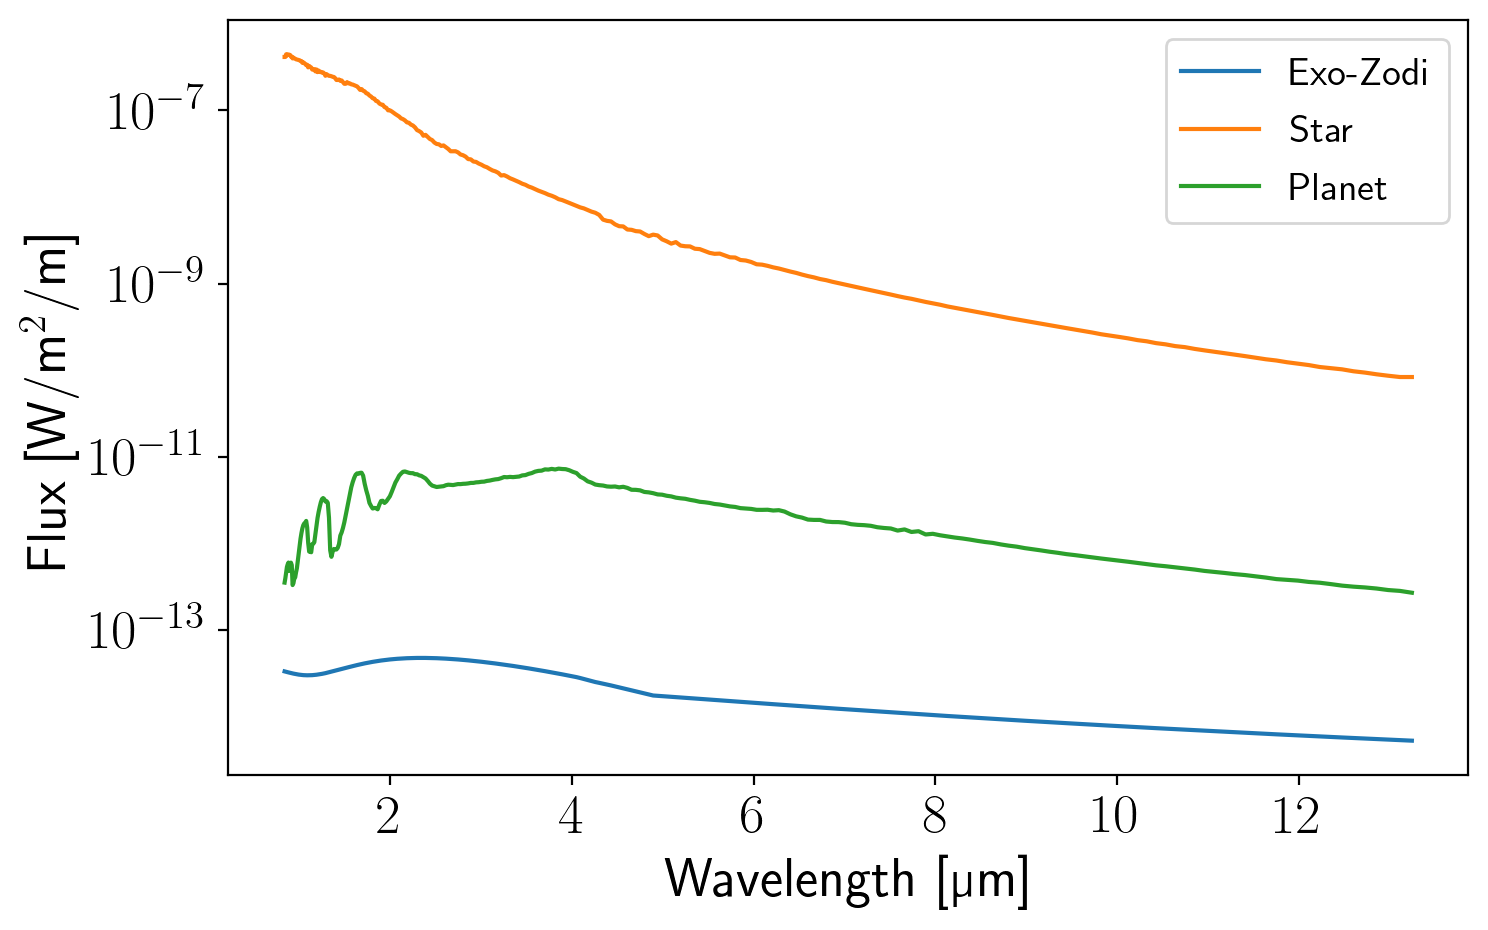

In [95]:
plt.plot(exopie.wl, Fdisk, label = "Exo-Zodi")
plt.plot(exopie.wl, Fstar_earth, label = "Star")
plt.plot(exopie.wl, Fplan_therm_earth, label = "Planet")
plt.xlabel("Wavelength [µm]")
plt.ylabel("Flux [W/m$^2$/m]")
plt.yscale("log")
plt.legend(fontsize=14)